<a href="https://colab.research.google.com/github/SpaceSapiens/Code-Explorer/blob/IITM_Course/MLT_Week5_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistics Regression


Link: https://www.youtube.com/watch?v=6RWC4-QH_go&t=109s

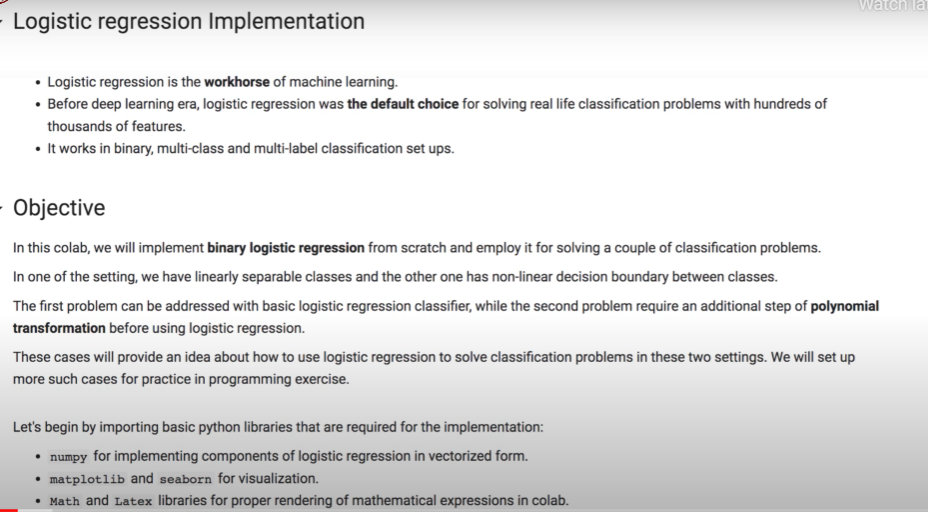

# Import Libraries

In [1]:
from IPython.display import display, Math,Latex
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Set a random seed value as a good practice
np.random.seed(1234)

# **Implementation**

# 1. Model

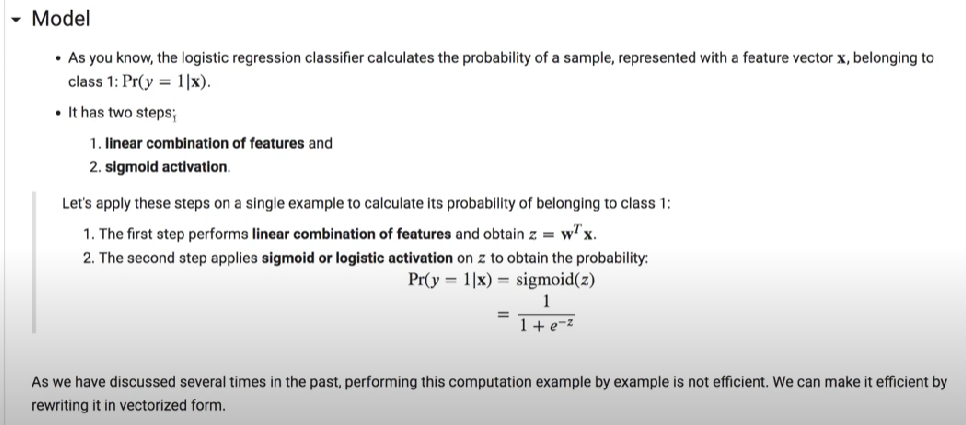

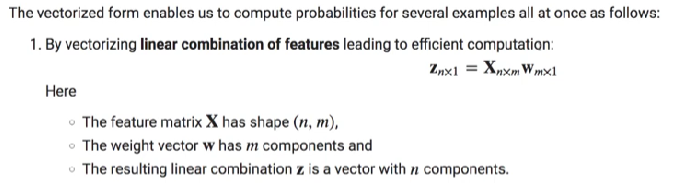